In [72]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy.io import wavfile # package to read WAV file
import pandas as pd
sns.set_style("white")
sns.set_style("ticks")

In [66]:
import os
mypath="audioData/"
(_, _, filenames) = next(os.walk(mypath))

In [ ]:
rPEF = []
rFEV1 = []
rFVC = []
for file in filenames:
    [fs, x] = wavfile.read(mypath+file)
    x = x/np.max(np.abs(x))
    t = np.arange(0,len(x))/fs
    # get analytic signal
    ax = signal.hilbert(x)
    envelope_hat = np.abs(ax)
    #filter the Hilbert envelope
    nyq_rate = fs / 2.0
    width = 1.0/nyq_rate # 5 Hz filter transition width.
    ripple_db = 10.0 # stop band attenuation
    fL_hz = 10
    N, beta = signal.kaiserord(ripple_db, width)
    taps = signal.firwin(N, fL_hz/nyq_rate, window=('kaiser', beta))
    envelope_hat_filt = signal.filtfilt(taps, 1,envelope_hat)
    print("Printing Parameters for file , ",file)
    #Corresponds to PEF
    rPEF.append(envelope_hat_filt.max())
    print("Raw PEF = ",envelope_hat_filt.max())
    
    #take cumsum of flow and then normalize
    estdVolume = np.cumsum(envelope_hat_filt)
    estdVolume = estdVolume/np.sum(estdVolume)
    #FEV1 Estimate
    rFEV1.append(estdVolume[np.where(t==1)[0][0]])
    print("Raw FEV1 = ",estdVolume[np.where(t==1)[0][0]])
    
    #FVC Estimate
    rFVC.append(estdVolume[-1])
    print("Raw FVC = ",estdVolume[-1])
    print("\n\n")
rPFT = pd.DataFrame(
    {'rPEF': rPEF,
     'rFEV1': rFEV1,
     'rFVC': rFVC
    })
rPFT.to_csv('rPFT.csv')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

Printing Parameters for file ,  FVC-1.wav
Raw PEF =  0.3592885137293084
Raw FEV1 =  5.708609738032711e-07
Raw FVC =  6.803623402311238e-06



Printing Parameters for file ,  FVC-2.wav
Raw PEF =  0.32610436255637787
Raw FEV1 =  8.102581864517104e-07
Raw FVC =  5.869754504152839e-06



Printing Parameters for file ,  FVC-3.wav
Raw PEF =  0.3559567835173336
Raw FEV1 =  5.724730102988734e-07
Raw FVC =  6.181840752717262e-06



Printing Parameters for file ,  FVC-microphone.wav
Raw PEF =  0.4097674411506329
Raw FEV1 =  5.511161530156133e-07
Raw FVC =  5.8780624029537585e-06





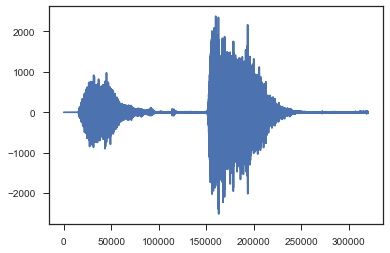

In [56]:
plt.plot(x)

In [3]:
x = x/np.max(np.abs(x))
t = np.arange(0,len(x))/fs
# get analytic signal
ax = signal.hilbert(x)
envelope_hat = np.abs(ax)

In [4]:
#filter the Hilbert envelope
nyq_rate = fs / 2.0
width = 1.0/nyq_rate # 5 Hz filter transition width.
ripple_db = 10.0 # stop band attenuation
fL_hz = 10
N, beta = signal.kaiserord(ripple_db, width)
taps = signal.firwin(N, fL_hz/nyq_rate, window=('kaiser', beta))
envelope_hat_filt = signal.filtfilt(taps, 1,envelope_hat)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

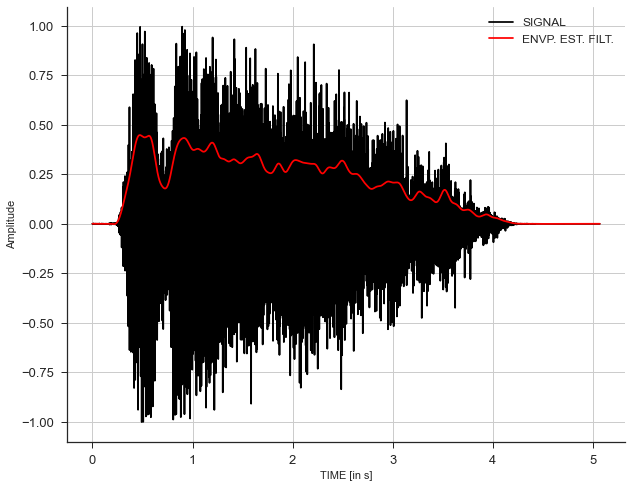

In [29]:
fig = plt.subplots(figsize=(10,8))
ax = plt.subplot(1,1,1)
ax.plot(t,x,color='black',label='SIGNAL')
ax.plot(t,envelope_hat_filt,color='red',label='ENVP. EST. FILT.')
ax.set_xlabel('TIME [in s]')
ax.set_ylabel('Amplitude')
ax.legend(loc='upper right',frameon=False,fontsize=12)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.grid(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# plt.xlim(0,0.5)
#plt.ylim(-1,1.5)
plt.show()

In [35]:
#Corresponds to PEF
envelope_hat_filt.max()

0.4487636776600239

In [36]:
#take cumsum of flow and then normalize
estdVolume = np.cumsum(envelope_hat_filt)
estdVolume = estdVolume/np.sum(estdVolume)

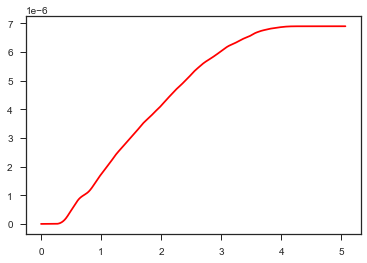

In [37]:
plt.plot(t,estdVolume,color='red',label='Estimated Volume')

In [38]:
#FEV1 Estimate
estdVolume[np.where(t==1)[0][0]]

1.731395981916569e-06

In [46]:
#FVC Estimate
estdVolume[-1]

6.9036928228316145e-06

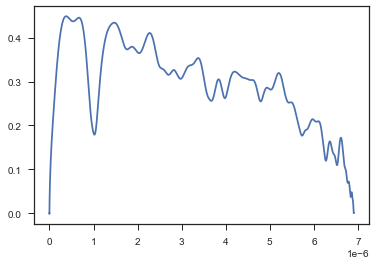

In [40]:
#estimated flow volume curve | Both y-axis and x-axis are normalized between 0 and 1
len(estdVolume) == len(envelope_hat_filt)
plt.plot(estdVolume, envelope_hat_filt)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

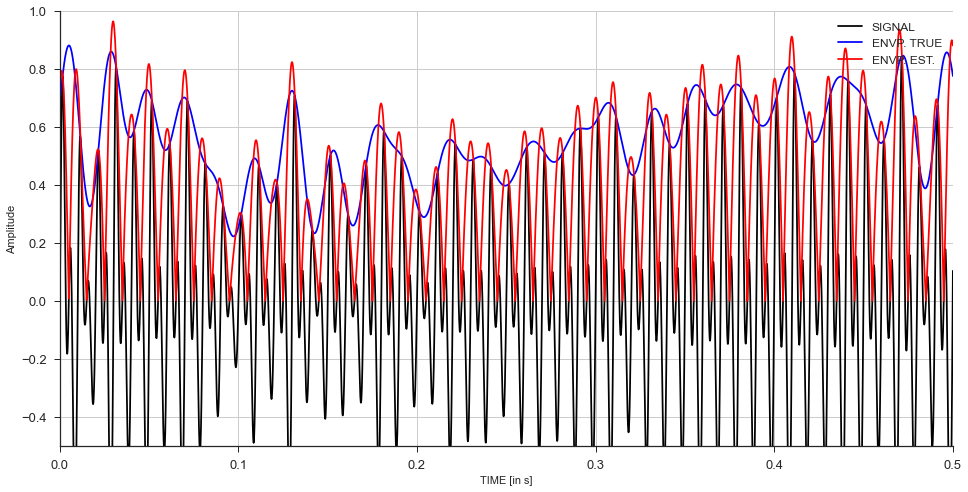

In [59]:
# init filter and signal params
fs = 8e3
dur = 5 # signal duration
num_samples = int(dur*fs)
t = np.arange(0,num_samples,1)/fs
nyq_rate = fs / 2.0
width = 5.0/nyq_rate # 5 Hz filter transition width.
ripple_db = 60.0 # stop band attenuation
N, beta = signal.kaiserord(ripple_db, width)
# create envelope
fL_hz = 50
envelope = create_envelope(num_samples=num_samples,fL_hz=fL_hz,N=N,beta=beta) 
# create carrier
carrier = create_carrier_harmonic(fs=fs,fc=100,num_samples=num_samples,ncomps=2)
# create am-fm signal
x = np.multiply(envelope,carrier)
# estimate analytic signal
ax = signal.hilbert(x)
envelope_hat = np.abs(ax)
# plt.plot(x)
fig = plt.subplots(figsize=(16,8))
ax = plt.subplot(1,1,1)
ax.plot(t,x,color='black',label='SIGNAL')
ax.plot(t,envelope,color='blue',label='ENVP. TRUE')
ax.plot(t,envelope_hat,color='red',label='ENVP. EST.')
ax.set_xlabel('TIME [in s]')
ax.set_ylabel('Amplitude')
ax.legend(loc='upper right',frameon=False,fontsize=12)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.grid(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlim(0,0.5)
plt.ylim(-.5,1)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

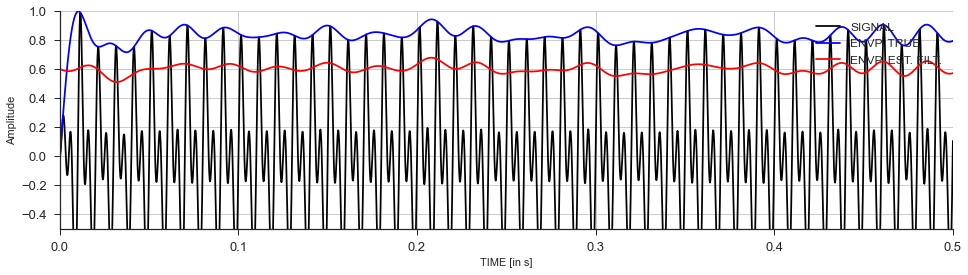

In [60]:
# init filter and signal params
fs = 8e3
dur = 5 # signal duration
num_samples = int(dur*fs)
t = np.arange(0,num_samples,1)/fs
nyq_rate = fs / 2.0
width = 5.0/nyq_rate # 5 Hz filter transition width.
ripple_db = 60.0 # stop band attenuation
N, beta = signal.kaiserord(ripple_db, width)
# create envelope
fL_hz = 50
envelope = create_envelope(num_samples=num_samples,fL_hz=fL_hz,N=N,beta=beta) 
# create carrier
carrier = create_carrier_harmonic(fs=fs,fc=100,num_samples=num_samples,ncomps=2)
# create am-fm signal
x = np.multiply(envelope,carrier)
# estimate analytic signal
ax = signal.hilbert(x)
envelope_hat = np.abs(ax)
taps = signal.firwin(N, fL_hz/nyq_rate, window=('kaiser', beta))
envelope_hat_filt = signal.filtfilt(taps, 1,envelope_hat)

fig = plt.subplots(figsize=(16,4))


ax = plt.subplot(1,1,1)
ax.plot(t,x,color='black',label='SIGNAL')
ax.plot(t,envelope,color='blue',label='ENVP. TRUE')
ax.plot(t,envelope_hat_filt,color='red',label='ENVP. EST. FILT.')
ax.set_xlabel('TIME [in s]')
ax.set_ylabel('Amplitude')
ax.legend(loc='upper right',frameon=False,fontsize=12)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.grid(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlim(0,0.5)
plt.ylim(-.5,1)


plt.show()

In [55]:
def create_envelope(num_samples,fL_hz=100,N=1000,beta=3):
    # we will create the envelope by low pass filtering white noise
    mean = 0
    std = 1
    taps = signal.firwin(N, fL_hz/nyq_rate, window=('kaiser', beta))
    x = np.random.normal(mean, std, size=num_samples)
    x = signal.filtfilt(taps, 1,x)
    x = (x-np.min(x))
    x = x/np.max(x)
    return x
def create_carrier_harmonic(fs=8e3,fc=200,num_samples=1000,ncomps=1):
    # this will create a harmonic carrier with ncomps harmonics
    x = []
    for i in range(ncomps):
        x.append(np.sin(2*np.pi*(i+1)*fc*np.arange(0,num_samples,1)/fs))
    x = sum(x)
    x = x/np.max(np.abs(x))
    return x
def create_carrier_noise(mean=0,std=1,num_samples=1000):
    # this will create a white noise carrier
    x = np.random.normal(mean, std, size=num_samples)
    x = x/np.abs(x)
    return x